Plotting the thermodynamic (reversible) potential $E_{\mathrm{th}}$ of a hydrogen-oxygen fuel cell as a function of temperature using the Shomate equations 

1. between 25 − 800C. All reactants and products are gas and at 1 atm

2. as a function of pressure between 0.1 atm-100 atm at 650 K. Both reactants and products are at the same pressure.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

define constants 

In [3]:
N_H2 = 1.0 # mol
N_O2 = 0.5 # mol
N_H2O = 1.0 # mol
# units: J/mol*K, P in atm
R = 8.31446 # J/mol*K
F = 96485.0 # C/mol
n = 2.0 # electrons
T_0 = 298.15 # K
P_0 = 1.0 # atm

NIST Webook Data
Linstrom, P. J. and Mallard, W. G. (2025). Nist chemistry webbook. NIST Standard Reference Database Number 69, National Institute of Standards and Technology, Gaithersburg, MD, USA. https://webbook.nist.gov/chemistry/.

In [4]:

# data from NIST
# for water vapor, properties are NOT extrapolated.
# constant cp assumed using (T=500)
SPECIES_DATA = {
    'H2O': [
        {
            'range': (298, 500.0),
            'coeffs': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 206.534251, -6.92120938],
            'h_form': -241826.4, 
            's_ref': 188.84 
        },
        {
            'range': (500.0, 1700.0),
            'coeffs': [30.09200, 6.832514, 6.793435, -2.534480, 0.082139, -250.8810, 223.3967, -241.8264],
            'h_form': -241830.0, 
            's_ref': 188.84 
        }
    ],
    'H2': [
        {
            'range': (298, 1000.0), 
            'coeffs': [33.066178, -11.363417, 11.432816, -2.772874, -0.158558, -9.980797, 172.707974, 0.0],
            'h_form': 0.0,  
            's_ref': 130.68 
        },
        {
            'range': (1000.0, 2500.0),
            'coeffs': [18.563083, 12.257357, -2.859786, 0.268238, 1.977990, -1.147438, 156.288133, 0.0],
            'h_form': 0.0,  
            's_ref': 130.68 
        }
    ],
    'O2': [
        {
            'range': (298, 700.0),
            'coeffs': [31.32234, -20.23531, 57.86644, -36.50624, -0.007374, -8.903471, 246.7945, 0.0],
            'h_form': 0.0,  
            's_ref': 205.15 
        },
        {
            'range': (700.0, 2000.0),
            'coeffs': [30.03235, 8.772972, -3.988133, 0.788313, -0.741599, -11.32468, 236.1663, 0.0],
            'h_form': 0.0, 
            's_ref': 205.15
        }
    ]
}


helper functions defined by

$H_i^\circ(T) =A_i t + \frac{B_i t^2}{2} + \frac{C_i t^3}{3} + \frac{D_i t^4}{4}- \frac{E_i}{t} + F_i - H_i$


$S_i^\circ(T) = A_i \ln t + B_i t + \frac{C_i t^2}{2} + \frac{D_i t^3}{3} - \frac{E_i}{2 t^2} + G_i$


$E_{\mathrm{th}}(T)=-\frac{1}{2F}\left[\Delta H^\circ(T)-\frac{T}{1000}\,\Delta S^\circ(T)\right]$


In [5]:

def get_coeffs(T, species):
    regimes = SPECIES_DATA[species]
    for regime in regimes:
        t_min, t_max = regime['range']
        if t_min <= T <= t_max:
            return regime


def get_h(T, species):
    data = get_coeffs(T, species)
    A, B, C, D, E, F, G, H = data['coeffs']
    t = T / 1000.0 # for shomate eqn
    h_kj_mol = (A * t) +  \
               (B * t**2 / 2) +  \
               (C * t**3 / 3) +  \
               (D * t**4 / 4) -  \
               (E / t) + F - H + \
               (data['h_form'] / 1000.0)
    return h_kj_mol * 1000


def get_s(T, P, species):
    data = get_coeffs(T, species)
    A, B, C, D, E, F, G, H = data['coeffs']
    t = T / 1000.0
    s_temp = (A * np.log(t)) + \
             (B * t) + \
             (C * (t**2) / 2) + \
             (D * (t**3) / 3) - \
             (E / (2 * t**2)) + G
    s_tot = s_temp - R * np.log(P / P_0) # when ideal gas 
    return s_tot

def get_E(T, P):
    h_h2o = get_h(T, 'H2O')
    s_h2o = get_s(T, P, 'H2O')
    h_h2 = get_h(T, 'H2')
    s_h2 = get_s(T, P, 'H2')
    h_o2 = get_h(T, 'O2')
    s_o2 = get_s(T, P, 'O2')

    delta_h = N_H2O * h_h2o - (N_H2 * h_h2 + N_O2 * h_o2)
    delta_s = N_H2O * s_h2o - (N_H2 * s_h2 + N_O2 * s_o2)

    delta_g = delta_h - (T * delta_s)
    e_rev = -delta_g / (n * F)

    return e_rev


run

In [6]:
temps_c = np.linspace(25, 800, 100)
temps_k = temps_c + T_0
e_vs_t = [get_E(T, 1.0) for T in temps_k]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\momun\AppData\Local\Temp\ipykernel_16060\2470599030.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$E_{\mathrm{th}}$ (V)', fontsize=11)


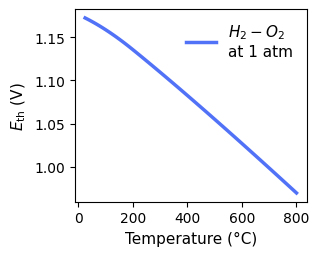

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(temps_c, e_vs_t, label='$H_2-O_2$\nat 1 atm', color="#5172f7", linewidth=2.5)
ax.set_xlabel('Temperature (°C)', fontsize=11)
ax.set_ylabel('$E_{\mathrm{th}}$ (V)', fontsize=11)
ax.legend(frameon=False, fontsize=11)
# fig.savefig('e_vs_t.pdf', dpi=300, bbox_inches='tight')


In [24]:
pressures_atm = np.logspace(-1, 2, 50)
#  T = 650 K for each P = 0.1 to 100 atm
e_vs_p = [get_E(650, P) for P in pressures_atm]

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
C:\Users\momun\AppData\Local\Temp\ipykernel_16060\1955480419.py:6: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$E_{\mathrm{th}}$ (V)', fontsize=11)


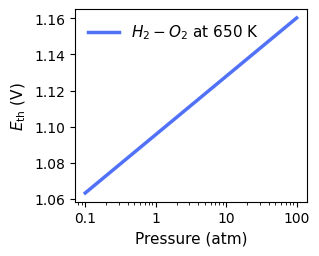

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2.5))
ax.plot(pressures_atm, e_vs_p, linewidth=2.5,
         color="#5172f7",
         label='$H_2-O_2$ at 650 K')
ax.set_xlabel('Pressure (atm)', fontsize=11)
ax.set_ylabel('$E_{\mathrm{th}}$ (V)', fontsize=11)
ax.set_xscale('log')
ax.set_xticks([0.1, 1, 10, 100])
ax.set_xticklabels(['0.1', '1', '10', '100']) 
ax.legend(frameon=False, fontsize=11)
# fig.savefig('e_vs_p.pdf', dpi=300, bbox_inches='tight')